In [1]:
 # import all the necessary libraries
import os
import re
import pandas as pd
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

import cartopy.crs as ccrs

# options
data_dir = os.getenv("HOME")+'/data/NOTAM-classifier'
pd.set_option('display.max_columns', 500)

# aestetics
plt.style.use('seaborn-whitegrid')
plt.rc('pdf',fonttype=42)
sns.mpl.rc('figure', figsize = (10, 8))
sns.set_context('notebook', font_scale=1.8, rc={'lines.linewidth': 2.5})

# File contents

In [2]:
NOTAM_df = pd.read_csv(data_dir+'/23-08-2018/Export.txt', sep=';').set_index('item_id')

In [3]:
print(len(NOTAM_df))

98547


## Header

In [4]:
NOTAM_df.head(20)

,folder_id,keyvalue,cat_id,svt,evt,validfromt,validtot,profcat,active,dataclass,wdays,rvt,rvid,crt,crid,source,vrnr,priority,spare,transcode,offical,supress,areaissued,notprefix,notserial,notyear,partno,notamcode,trafficind,notpurpose,notscope,minflt,maxflt,subj,briefingcard,printcat,IsNew,qsign,qstat,lat,lng,radius,severity,last_modified_dt,EstimatedEvt,item_id_1,fulltext,txt_id,HEX(id)
item_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4665277,-1,XXXX,5,2018-07-01 22:34:00.000,2018-07-31 23:59:00.000,0,0,2,1,TXT,127,2018-07-01 04:00:00.000,1698,2018-06-30 23:58:00.000,1,EUC,1,1,0,N,1,0,MMMX,MM,A3621,18,,QRRCA,IV,BO,W,0,185,NaN,0,-1,0,NaN,NaN,10270,-60160,27,0,NaN,NaN,4665277,A3621/18 NOTAMN Q)MMFR/QRRCA/IV/BO/W/000/185/1...,11,0x00003F3F
4665276,-1,XXXX,5,2018-07-01 07:00:00.000,2018-07-01 15:30:00.000,0,0,2,1,TXT,127,2018-07-01 03:54:00.000,1698,2018-06-30 23:55:00.000,1,EUC,1,1,0,N,1,1,LTAA,LT,A3657,18,,QWELW,IV,BO,W,300,300,NaN,0,-1,0,NaN,NaN,22070,17880,42,0,NaN,NaN,4665276,A3657/18 NOTAMN Q)LTXX/QWELW/IV/BO/W/300/300/3...,11,0x00003F3F
4665275,-1,XXXX,5,2018-07-01 07:00:00.000,2018-07-01 15:30:00.000,0,0,2,1,TXT,127,2018-06-30 23:52:00.000,1,2018-06-30 23:52:00.000,1,EUC,1,1,0,N,1,1,LTAA,LT,G4732,18,,QWELW,IV,BO,W,300,300,NaN,0,-1,1,NaN,NaN,22070,17880,42,0,NaN,NaN,4665275,G4732/18 NOTAMN Q)LTXX/QWELW/IV/BO/W/300/300/3...,11,0x00003F3F
4665274,-1,XXXX,5,2018-07-01 00:00:00.000,2018-07-31 23:59:00.000,0,0,2,1,TXT,127,2018-07-02 12:47:00.000,1503,2018-06-30 23:50:00.000,1,EUC,1,1,0,N,1,1,MMMX,MM,A3620,18,,QRRCA,IV,BO,W,0,10,NaN,0,-1,0,NaN,NaN,10100,-59900,2,0,NaN,NaN,4665274,A3620/18 NOTAMN Q)MMFR/QRRCA/IV/BO/W/000/010/1...,11,0x00003F3F
4665273,-1,XXXX,3,2018-07-01 01:15:00.000,2018-07-01 04:00:00.000,0,0,2,1,TXT,127,2018-07-07 05:32:00.000,1598,2018-06-30 23:50:00.000,1,EUC,1,1,0,N,1,0,EDDZ,ED,A3566,18,,QFALC,IV,NBO,A,0,999,NaN,0,-1,0,NaN,NaN,32180,5990,5,0,NaN,NaN,4665273,A3566/18 NOTAMN Q)EDWW/QFALC/IV/NBO/A/000/999/...,11,0x00003F3F
4665272,2782,XXXX,3,2018-07-01 03:00:00.000,2018-07-01 10:00:00.000,0,0,2,0,TXT,127,2018-07-01 01:41:00.000,1,2018-06-30 23:47:00.000,1,EUC,1,1,0,N,1,0,KIAD,KZ,A2093,18,,QMRLC,IV,NBO,A,0,999,NaN,0,-1,1,NaN,NaN,23370,-46480,5,0,NaN,NaN,4665272,A2093/18 NOTAMN Q)KZDC/QMRLC/IV/NBO/A/000/999/...,11,0x00003F3F
4665271,2782,XXXX,3,2018-06-30 23:33:00.000,2018-07-01 23:33:00.000,0,0,2,0,TXT,127,2018-07-01 02:43:00.000,1,2018-06-30 23:47:00.000,1,EUC,1,1,0,N,1,1,KOKC,KZ,A0956,18,,QMRXX,IV,NBO,A,0,999,NaN,0,-1,1,NaN,NaN,21240,-58560,5,0,NaN,NaN,4665271,A0956/18 NOTAMN Q)KZFW/QMRXX/IV/NBO/A/000/999/...,11,0x00003F3F
4665270,2782,XXXX,3,2018-06-30 23:32:00.000,2018-07-01 23:32:00.000,0,0,2,0,TXT,127,2018-07-01 02:43:00.000,1,2018-06-30 23:46:00.000,1,EUC,1,1,0,N,1,1,KOKC,KZ,A0955,18,,QMRXX,IV,NBO,A,0,999,NaN,0,-1,1,NaN,NaN,21240,-58560,5,0,NaN,NaN,4665270,A0955/18 NOTAMN Q)KZFW/QMRXX/IV/NBO/A/000/999/...,11,0x00003F3F
4665269,-1,XXXX,3,2018-07-01 03:00:00.000,2018-07-01 04:00:00.000,0,0,2,1,TXT,127,2018-07-08 05:19:00.000,1598,2018-06-30 23:46:00.000,1,EUC,1,1,0,N,1,0,KSLC,KZ,A3478,18,,QMRLC,IV,NBO,A,0,999,NaN,0,-1,0,NaN,NaN,24470,-67190,5,0,NaN,NaN,4665269,A3478/18 NOTAMN Q)KZLC/QMRLC/IV/NBO/A/000/999/...,11,0x00003F3F


In [5]:
NOTAM_df.dtypes

folder_id             int64
keyvalue             object
cat_id                int64
svt                  object
evt                  object
validfromt            int64
validtot              int64
profcat               int64
active                int64
dataclass            object
wdays                 int64
rvt                  object
rvid                  int64
crt                  object
crid                  int64
source               object
vrnr                  int64
priority              int64
spare                 int64
transcode            object
offical               int64
supress               int64
areaissued           object
notprefix            object
notserial            object
notyear               int64
partno               object
notamcode            object
trafficind           object
notpurpose           object
notscope             object
minflt                int64
maxflt                int64
subj                float64
briefingcard          int64
printcat            

# Info per column

In [6]:
n_samples = len(NOTAM_df)
print('n_rows = ', n_samples)
print(NOTAM_df['source'].unique())
print(NOTAM_df['dataclass'].unique())

n_rows =  98547
['EUC  ']
['TXT ']


## One row

In [7]:
for c in NOTAM_df.columns:
    print(c, NOTAM_df[c].iloc[5])

folder_id 2782
keyvalue XXXX                
cat_id 3
svt 2018-07-01 03:00:00.000
evt 2018-07-01 10:00:00.000
validfromt 0
validtot 0
profcat 2
active 0
dataclass TXT 
wdays 127
rvt 2018-07-01 01:41:00.000
rvid 1
crt 2018-06-30 23:47:00.000
crid 1
source EUC  
vrnr 1
priority 1
spare 0
transcode N
offical 1
supress 0
areaissued KIAD
notprefix KZ 
notserial A2093
notyear 18
partno    
notamcode QMRLC
trafficind IV
notpurpose NBO
notscope A 
minflt 0
maxflt 999
subj nan
briefingcard 0
printcat -1
IsNew 1
qsign nan
qstat nan
lat 23370
lng -46480
radius 5
severity 0
last_modified_dt nan
EstimatedEvt nan
item_id_1 4665272
fulltext A2093/18 NOTAMN Q)KZDC/QMRLC/IV/NBO/A/000/999/3857N07728W005 A)KIAD B)1807010300 C)1807011000 E)RWY 01L/19R CLSD
txt_id 11
HEX(id) 0x00003F3F


## Feature extraction from the full text

In [8]:
info_names = [
    'id', 'previous_id', 'type', 
    'new', 'good', 'FIR', 'FIR_12', 'FIR_34',
    'code', 'code_23', 'code_45', 
    'trafficind', 'purpose', 'scope', 'minflt', 'maxflt', 
    'lat', 'lng', 'location', 'n_locations',
    'radius', 'duration', 'end_est', 
    'diurnal_duration', 'perm', 'supress', 'txt',
    'len_txt', 'rvid',
    
    ]

def append_dict(a, b):
    """ Append dictionary b to 
    dictionary a"""
    
    for k in a.keys():
        a[k].append(b[k])
    
    return

def str_dms_to_dd(coord_str):
    """ Convert sexadecimal to 
    decimal coordinates.
    
    https://www.latlong.net/lat-long-dms.html """
    
    try:
        d, m, s = coord_str[0:2], coord_str[2:4], 0.0
        lat = float(d) + float(m)/60 + float(s)/3600
        if coord_str[4] == 'S':
            lat = -lat
        d, m, s = coord_str[5:8], coord_str[8:10], 0.0
        lng = float(d) + float(m)/60 + float(s)/3600
        if coord_str[10] == 'W':
            lng = -lng
        radius = int(coord_str[11:])

    except:
        lat = np.nan
        lng = np.nan
        raise ValueError(
            'Unexpected string format for the coordinates {0}'.format(coord_str))
        
    return lat, lng, radius

def get_NOTAM_info(txt):
    """ Extract NOTAM info 
    and return dictionary
    """
    
    #TODO: put rare codes and locations
    # into "rare encoders"
    
    # initialise output dictionary
    N = {c:None for c in info_names}
    
    N['txt'] = txt[txt.find('E)')+2: txt.find('F)')]
    N['len_txt'] = len(N['txt'])
    
    # and look over Q, A, B and C
    # then check each of the above is here    
    # high level split
    # find split position
    pos = {}
    for letter in ['Q', 'A', 'B', 'C', 'E', 'F', 'G']:
        pos[letter] = txt.find(letter+')')
        # exit if one of those is not found.
        # It means the NOTAM is unstructured 
        # and should be examined further
        if pos[letter] == -1 and letter in ['Q', 'A', 'B', 'C', 'E']:
            N['good'] = 0
            return N
    
    # first part: NOTAM type and id
    words = re.findall(r'\S+', txt[0:pos['Q']])
    if len(words) == 2:
        N['id'], N['type'] = words
        N['previous_id'] = None
        N['new'] = 1
    elif len(words) == 3:
        # updated NOTAM
        N['id'], N['type'], N['previous_id'] = words
        N['new'] = 0
        
    # second part -> Q) NOTAM description
    words = txt[pos['Q']+2:pos['A']].split('/')
    # check that all 8 parts are here:
    if len(words) != 8:
        raise
        N['good'] = False
        return N
    
    # contains 'XX' if multiple FIRs are involved
    N['FIR'] = words[0]
    N['FIR_12'] = words[0][0:2]
    N['FIR_34'] = words[0][2:4]

    # this is the core information of the NOTAM
    # split into 2 as well
    N['code'] = words[1]
    N['code_23'] = words[1][1:3]
    N['code_45'] = words[1][3:5]


    N['trafficind'] = words[2]
    N['purpose'] = words[3]
    N['scope'] = words[4]
    N['minflt'] = int(words[5])
    N['maxflt'] = int(words[6])
    N['lat'], N['lng'], N['radius'] = str_dms_to_dd(words[7])
    
    # second part -> A) location
    # ICAO indicator of the aerodrome or FIR
    # here we only record the first position
    # as well as the number of single FIR
    # the information on the geographical size 
    # of the NOTAM should alreayd be encapsulated in
    # the distance measurement and the first 
    # FIR information
    words = re.findall(r'\S+', txt[pos['A']+2:pos['B']])
    N['location'] = words[0]
    N['n_locations'] = len(words)
    
    # third and fourth part B) and C) -> time
    # here we record only the durantion length
    start_str = re.findall(r'\S+', txt[pos['B']+2:pos['C']])[0]
    
    # look if D) is present between C) and E)
    # only record whether it's set or not
    pos['D'] = txt.find('D)')
    if pos['D'] > -1 :
        N['diurnal_duration'] = True
        end_str = re.findall(r'\S+', txt[pos['C']+2:pos['D']])[0]
    else:
        N['diurnal_duration'] = False
        end_str = re.findall(r'\S+', txt[pos['C']+2:pos['E']])[0]

    # encode whether NOTAM has an estimated end
    # which requires a follow-up NOTAM afterwards
    if re.findall('EST', end_str):
        N['end_est'] = True
        end_str = end_str[:-3]
    else:
        N['end_est'] = False
    
    if end_str == 'PERM':
        N['perm'] = True
        N['duration'] = 0.0
    else:
        N['perm'] = False
        
        # time difference in decimal days
        start = datetime.strptime(start_str, "%y%m%d%H%M")
        end = datetime.strptime(end_str, "%y%m%d%H%M")
        N['duration'] = (end-start)/timedelta(days=1)
    
    # TODO: process F and G
    
    # if everything went well
    # set good to 1 and return
    # dictionary
    N['good'] = True
    
    return N

NOTAMs = {c:[] for c in info_names}

#for i in range(10):
for i in range(n_samples):

    txt = NOTAM_df.iloc[i]['fulltext']    
    #NOTAM = get_NOTAM_info(txt)    
    #print(txt)
    #continue    
    # catch error and display NOTAM accordingly
    try:
        NOTAM = get_NOTAM_info(txt)
    except:
        if NOTAM_df.iloc[i]['supress'] == 0:
            print(txt)
            print(NOTAM_df.iloc[i])
            
    NOTAM['rvid'] = NOTAM_df.iloc[i]['rvid']
    NOTAM['supress'] = NOTAM_df.iloc[i]['supress']

    append_dict(NOTAMs, NOTAM)

#NOTAMs

## Feature checks

In [9]:
# transform into dataframe
NOTAM_info_df = pd.DataFrame(NOTAMs)

In [10]:
# Newly created keys
NOTAM_info_df.keys()

Index(['FIR', 'FIR_12', 'FIR_34', 'code', 'code_23', 'code_45',
       'diurnal_duration', 'duration', 'end_est', 'good', 'id', 'lat',
       'len_txt', 'lng', 'location', 'maxflt', 'minflt', 'n_locations', 'new',
       'perm', 'previous_id', 'purpose', 'radius', 'rvid', 'scope', 'supress',
       'trafficind', 'txt', 'type'],
      dtype='object')

In [11]:
# Original keys
NOTAM_df.keys()

Index(['folder_id', 'keyvalue', 'cat_id', 'svt', 'evt', 'validfromt',
       'validtot', 'profcat', 'active', 'dataclass', 'wdays', 'rvt', 'rvid',
       'crt', 'crid', 'source', 'vrnr', 'priority', 'spare', 'transcode',
       'offical', 'supress', 'areaissued', 'notprefix', 'notserial', 'notyear',
       'partno', 'notamcode', 'trafficind', 'notpurpose', 'notscope', 'minflt',
       'maxflt', 'subj', 'briefingcard', 'printcat', 'IsNew', 'qsign', 'qstat',
       'lat', 'lng', 'radius', 'severity', 'last_modified_dt', 'EstimatedEvt',
       'item_id_1', 'fulltext', 'txt_id', 'HEX(id)'],
      dtype='object')

In [15]:
n_samples = len(NOTAM_df)

# number of entries
n_total = len(NOTAM_info_df)
print(n_samples, n_total, 100.*n_total/n_samples)

# number of good entries
good = NOTAM_info_df['good'] == 1
n_good = len(NOTAM_info_df[good])
print(n_samples, n_good, 100.0*n_good/n_samples)

98547 98547 100.0
98547 98089 99.53524714095812


In [21]:
bad = NOTAM_info_df['good'] == 0
NOTAM_info_df[bad].iloc[100]


FIR                                           None
FIR_12                                        None
FIR_34                                        None
code                                          None
code_23                                       None
code_45                                       None
diurnal_duration                              None
duration                                       NaN
end_est                                       None
good                                             0
id                                            None
lat                                            NaN
len_txt                                         30
lng                                            NaN
location                                      None
maxflt                                         NaN
minflt                                         NaN
n_locations                                    NaN
new                                            NaN
perm                           

In [328]:
# serial number
a = NOTAM_info_df['id'].str.split('/', expand=True)[0]
b = NOTAM_df['notserial']

diff = (a.values!=b.values) & (a.values != None)
print(sum(diff))

0


In [329]:
# code
print(NOTAM_info_df['code'].str.split('/').head())
#print(NOTAM_df['notamcode'].head())

0    [QRRCA]
1    [QWELW]
2    [QWELW]
3    [QRRCA]
4    [QFALC]
Name: code, dtype: object


## Locations

In [296]:
lng = NOTAM_info_df['lng']
lat = NOTAM_info_df['lat']

N = len(lng)
print(max(lng), min(lng))
print(max(lat), min(lat))

print(np.sum(np.isfinite(lng))/N, N, np.sum(np.isfinite(lng)))

# check it is consistent with entries 
# (returns 0's for coordinattes)
#no_coord_df = NOTAM_df[np.logical_not(np.isfinite(lng))]
#no_coord_df[['lat', 'lng', 'fulltext', 'notamcode', 'supress', 'rvid']].iloc[0].values

179.46666666666667 -178.06666666666666
78.28333333333333 -72.56666666666666
0.9953524714095812 98547 98089


98547


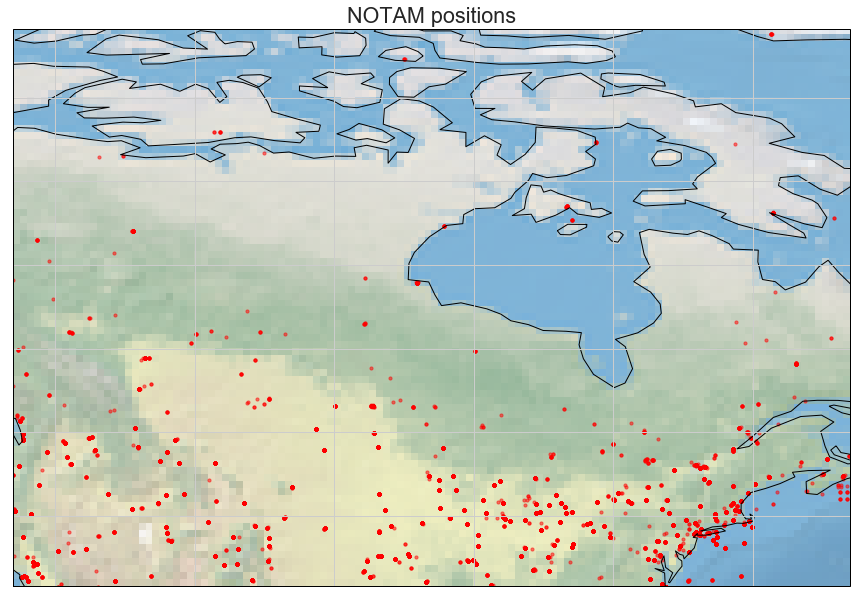

In [297]:
# see https://uoftcoders.github.io/studyGroup/lessons/python/cartography/lesson/
print(len(lng))

canada_east = -63
canada_west = -123
canada_north = 75
canada_south = 37


fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(
    1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(NOTAMs['lng'], NOTAMs['lat'], alpha=0.5, s=10, color='red')

ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_title('NOTAM positions')

ax.set_extent([canada_west, canada_east, canada_south, canada_north])


None

# Human classification

## Suppressed NOTAMS

In [333]:
supressed = NOTAM_df['supress'] == 1
print('Supressed NOTAMS = {0:.2f}%'.format(100*np.sum(supressed)/n_samples))

Supressed NOTAMS = 45.93%


# Features importance analysis

In [334]:
len(NOTAM_info_df)

98547

In [335]:
# features to keep
features = set()

In [336]:
NOTAM_info_df.head()

,FIR,FIR_12,FIR_34,code,code_23,code_45,diurnal_duration,duration,end_est,good,id,lat,len_txt,lng,location,maxflt,minflt,n_locations,new,perm,previous_id,purpose,radius,rvid,scope,supress,trafficind,txt,type
0,MMFR,MM,FR,QRRCA,RR,CA,False,30.059028,False,True,A3621/18,17.116667,43,-100.266667,MMFR,185.0,0.0,1.0,1.0,False,None,BO,27.0,1698,W,0,IV,"ACT MIL AREAS MMR-116, MMR-117 AND MMR-119",NOTAMN
1,LTXX,LT,XX,QWELW,WE,LW,False,0.354167,False,True,A3657/18,36.783333,129,29.800000,LTAA,300.0,300.0,2.0,1.0,False,None,BO,42.0,1698,W,1,IV,AIRBORNE WARNING AND CONTROL SYSTEM FLIGHT WIL...,NOTAMN
2,LTXX,LT,XX,QWELW,WE,LW,False,0.354167,False,True,G4732/18,36.783333,99,29.800000,LTAA,300.0,300.0,2.0,1.0,False,None,BO,42.0,1,W,1,IV,AWACS/HIK UCUSU YAPILACAKTIR. SAHA:362500N0303...,NOTAMN
3,MMFR,MM,FR,QRRCA,RR,CA,False,30.999306,False,True,A3620/18,16.833333,148,-99.833333,MMFR,10.0,0.0,1.0,1.0,False,None,BO,2.0,1503,W,1,IV,RESTRICTED AREA LATERAL LIMIT: CIRCLE OF 2...,NOTAMN
4,EDWW,ED,WW,QFALC,FA,LC,False,0.114583,False,True,A3566/18,53.633333,30,9.983333,EDDH,999.0,0.0,1.0,1.0,False,None,NBO,5.0,1598,A,0,IV,AERODROME CLSD EXCEPT HELIPADS,NOTAMN


## Badly formatted NOTAMS

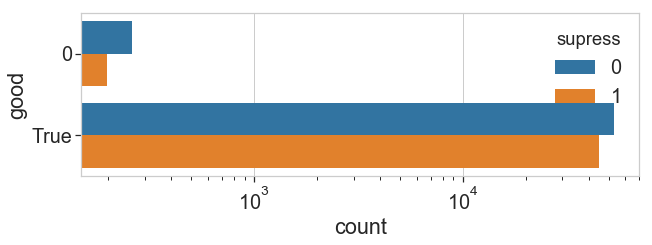

In [337]:
# TODO: explore the badly formatted NOTAMS

fig, ax = plt.subplots(figsize=(10, 3))
g = sns.countplot(y='good',  hue='supress', data=NOTAM_info_df, ax=ax)
ax.set_xscale('log')

## Traffic incidence

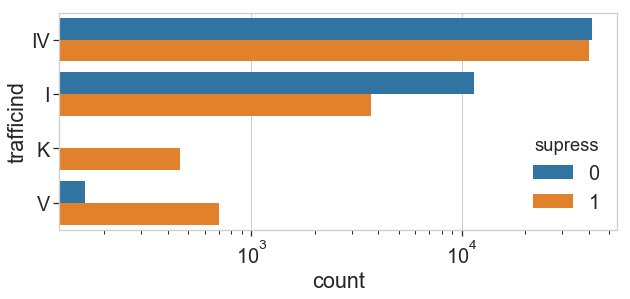

In [338]:
"""
I = IFR
V = VFR
K = NOTAM is a checklist
Note.— Depending on the NOTAM subject and content, 
the qualifier field TRAFFIC may contain combined qualifiers. 
Guidance concerning the combination of TRAFFIC 
qualifiers with subject and conditions 
in accordance with the NOTAM Selection Criteria is contained in Appendix B.
"""

# keep it
features.add('trafficind')

fig, ax = plt.subplots(figsize=(10, 4))
g = sns.countplot(y='trafficind',  hue='supress', data=NOTAM_info_df, ax=ax)
ax.set_xscale('log')

## Durations

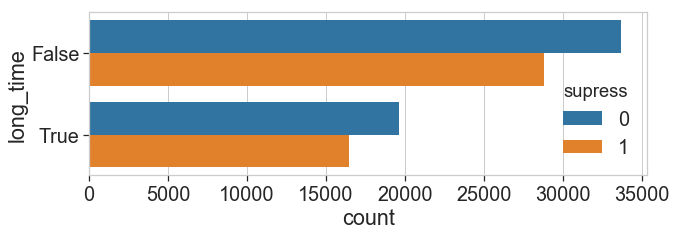

In [339]:
# Don't keep it
# consider split into week days
# and month days

fig, ax = plt.subplots(figsize=(10, 3))
NOTAM_info_df['long_time'] = NOTAM_info_df['duration'] > 1.0
g = sns.countplot(y='long_time',  hue='supress', data=NOTAM_info_df, ax=ax)

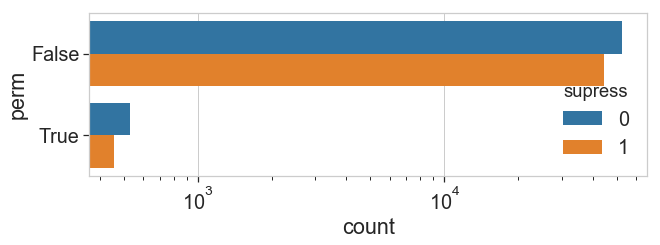

In [340]:
# Don't keep it

fig, ax = plt.subplots(figsize=(10, 3))
g = sns.countplot(y='perm',  hue='supress', data=NOTAM_info_df, ax=ax)
ax.set_xscale('log')

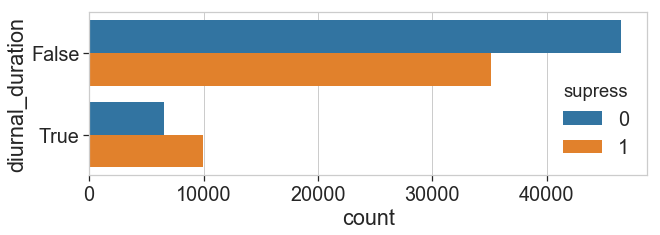

In [341]:
# says when it happens during the day
# keep it
features.add('diurnal_duration')

fig, ax = plt.subplots(figsize=(10, 3))
g = sns.countplot(y='diurnal_duration',  hue='supress', data=NOTAM_info_df, ax=ax)

## Altitudes

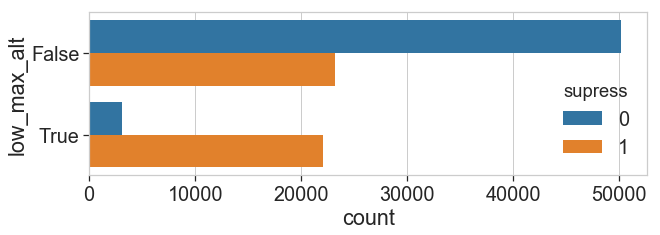

In [342]:
# whether the max flight level is low
# keep it
features.add('low_max_alt')

fig, ax = plt.subplots(figsize=(10, 3))
NOTAM_info_df['low_max_alt'] = NOTAM_info_df['maxflt'] < 300 # 30k-35k feet
g = sns.countplot(y='low_max_alt',  hue='supress', data=NOTAM_info_df, ax=ax)

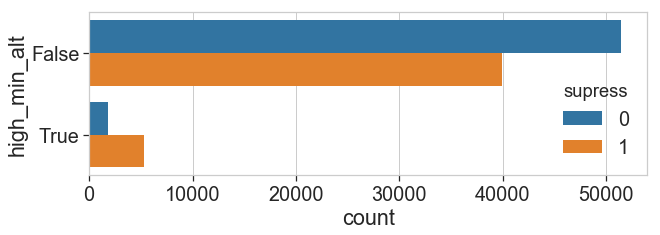

In [343]:
# whether the max flight level is low
# keep it
features.add('high_min_alt')

fig, ax = plt.subplots(figsize=(10, 3))
df = NOTAM_info_df
NOTAM_info_df['high_min_alt'] = NOTAM_info_df['minflt'] > 0
g = sns.countplot(y='high_min_alt',  hue='supress', data=NOTAM_info_df, ax=ax)

## NOTAM codes

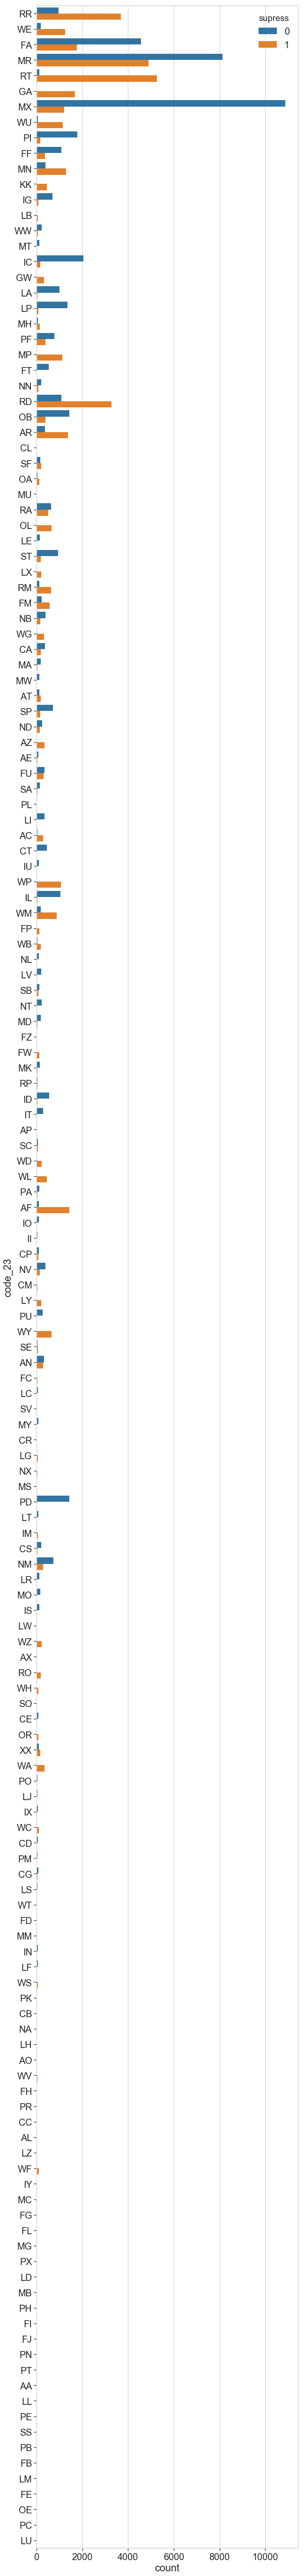

In [344]:
# The second and third letters identify 
# the subject being reported.

# keep it
features.add('code_23')

fig, ax = plt.subplots(figsize=(10, 100))
g = sns.countplot(y='code_23',  hue='supress', data=NOTAM_info_df, ax=ax)

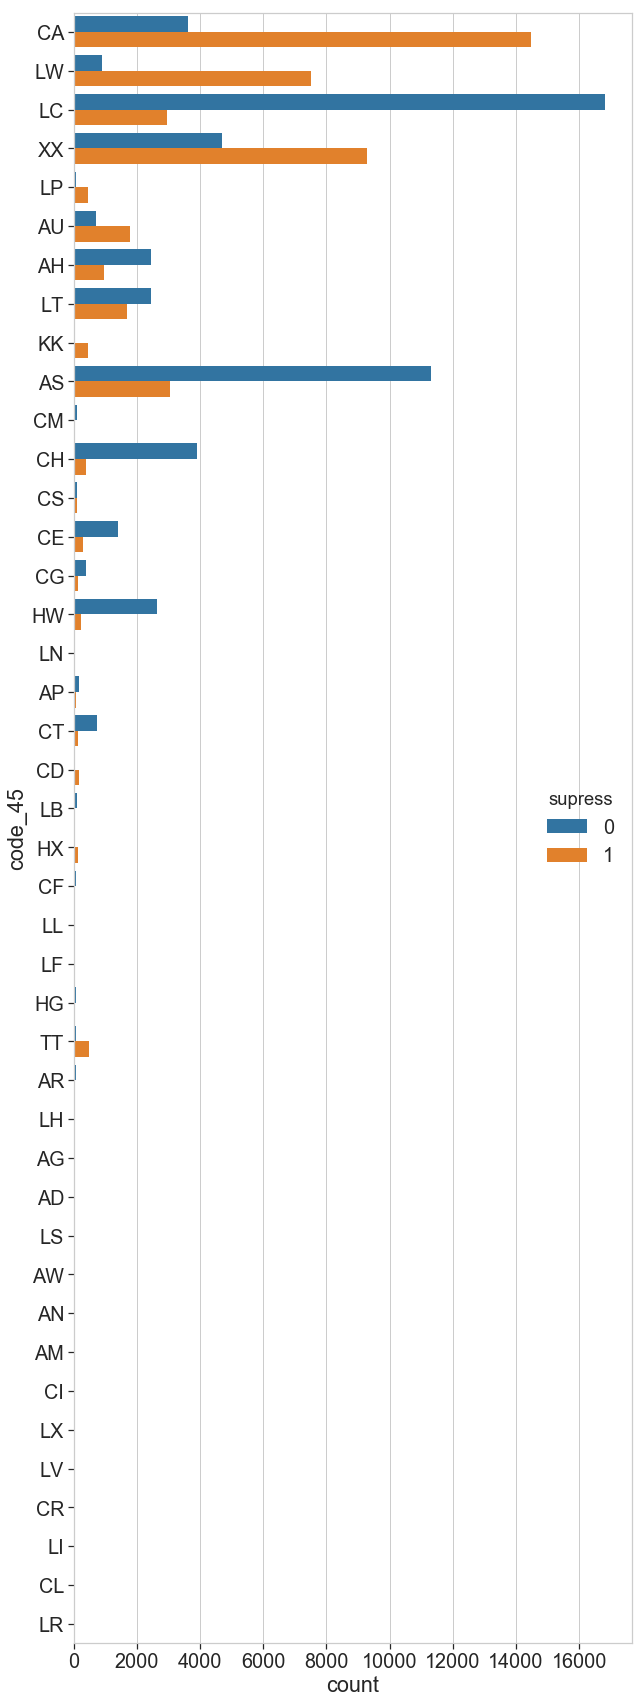

In [345]:
# The fourth and fifth letters identify the 
# status of operation of the subject being reported.

# keep it
features.add('code_45')

fig, ax = plt.subplots(figsize=(10, 30))
g = sns.countplot(y='code_45',  hue='supress', data=NOTAM_info_df, ax=ax)

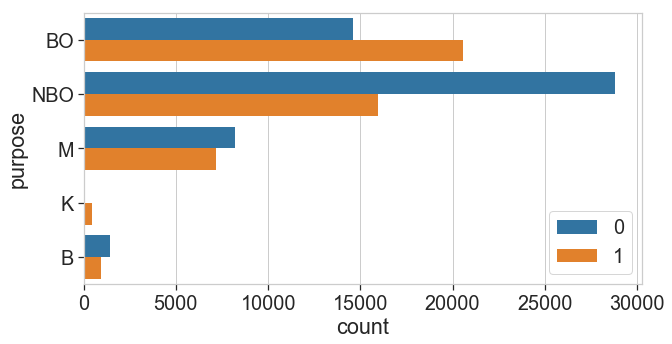

In [346]:
# N = NOTAM selected for the immediate attention of aircraft operators
# B = NOTAM selected for PIB entry 
# O = NOTAM concerning flight operations  
# M = Miscellaneous NOTAM;
# K = not subject for a briefing, but it is available on request NOTAM is a checklist.

# keep it
features.add('code_45')

fig, ax = plt.subplots(figsize=(10, 5))
g = sns.countplot(y='purpose',  hue='supress', data=NOTAM_info_df, ax=ax)
ax.legend(frameon=True)
None

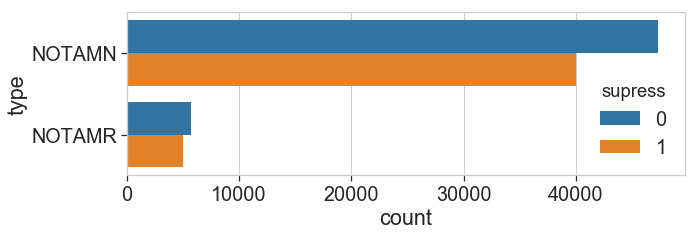

In [347]:
# NOTAM type
# no "C" type?
# don't keep it

fig, ax = plt.subplots(figsize=(10, 3))
g = sns.countplot(y='type',  hue='supress', data=NOTAM_info_df, ax=ax)

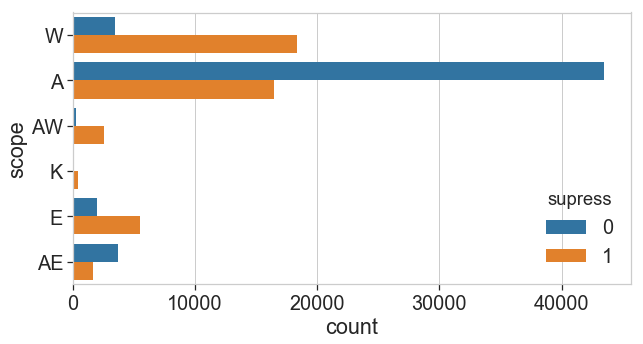

In [348]:
# A = Aerodrome
# E = En-route
# W = Nav warning
# K = NOTAM is a checklist
# again, checklist?

# keep it
features.add('scope')

fig, ax = plt.subplots(figsize=(10, 5))
g = sns.countplot(y='scope',  hue='supress', data=NOTAM_info_df, ax=ax)

## Location

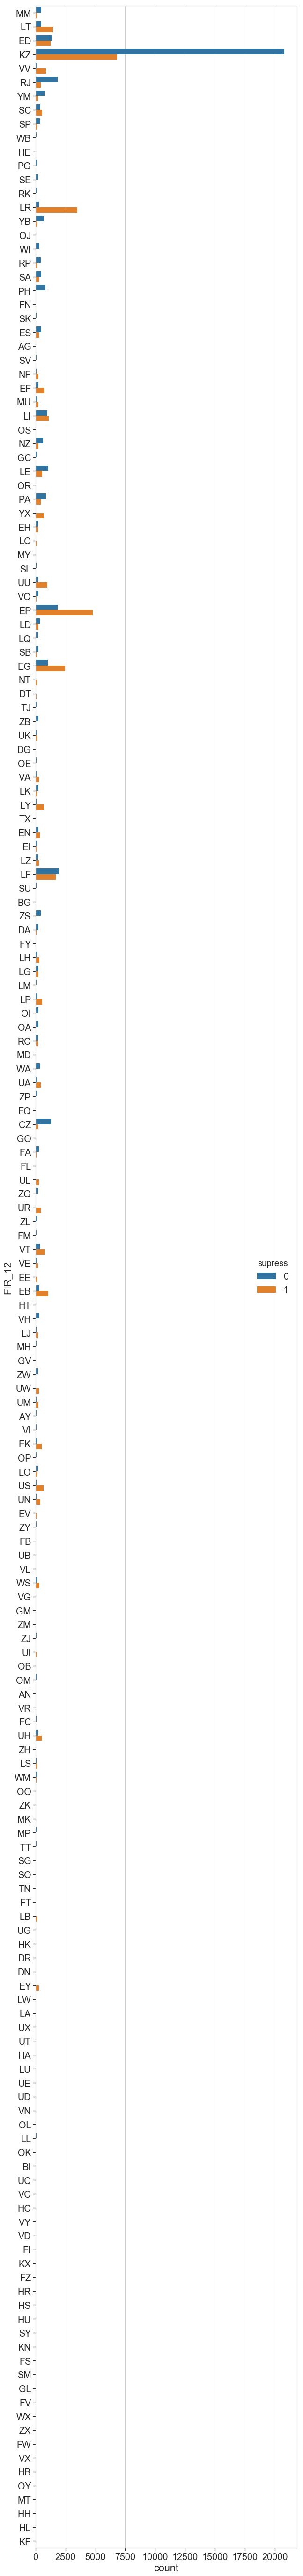

In [349]:
# first two letters of FIR (=country)

# FIR_34 is degenerate, not sure it is useful
# print(len(NOTAM_info_df['FIR_34'].unique()))

# keep it
# consider taking the 
# full FIR
features.add('FIR_12')

fig, ax = plt.subplots(figsize=(10, 100))
g = sns.countplot(y='FIR_12',  hue='supress', data=NOTAM_info_df, ax=ax)

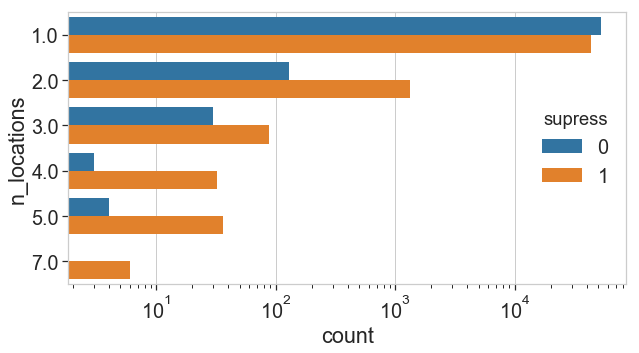

In [350]:
# A) field
# FIR OR airport code
# seems to be likely suppressed if 
# more than 1 location

# keep it
features.add('n_locations')

fig, ax = plt.subplots(figsize=(10, 5))
g = sns.countplot(y='n_locations',  hue='supress', data=NOTAM_info_df, ax=ax)
ax.set_xscale('log')

## Radii

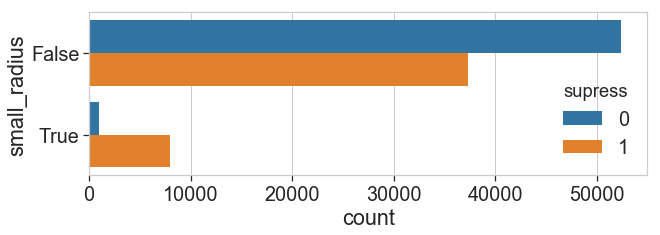

In [351]:
# radius size
# whether it's large or not

# keep it
# consider giving it 
# as continuous variable?
features.add('small_radius')

fig, ax = plt.subplots(figsize=(10, 3))
NOTAM_info_df['small_radius'] = NOTAM_info_df['radius'] < 5.0
g = sns.countplot(y='small_radius',  hue='supress', data=NOTAM_info_df, ax=ax)

## Text

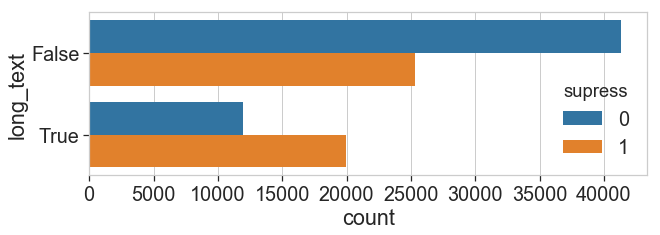

In [352]:
# free text length
# whether it's long

# keep it
# consider giving it
# as continuous variable?
features.add('long_text')

fig, ax = plt.subplots(figsize=(10, 3))

NOTAM_info_df['long_text'] = NOTAM_info_df['len_txt'] > 100
g = sns.countplot(y='long_text',  hue='supress', data=NOTAM_info_df, ax=ax)

In [353]:
# columns to keep
print(list(features))
cols = ['id', 'good', 'txt', 'supress', 'rvid']+list(features)

NOTAM_info_df[cols].set_index('id').to_csv(data_dir+'/NOTAMS.csv')

['scope', 'FIR_12', 'high_min_alt', 'low_max_alt', 'diurnal_duration', 'long_text', 'small_radius', 'trafficind', 'code_23', 'n_locations', 'code_45']


In [319]:
NOTAM_info_df[cols].set_index('id').head()

,good,txt,supress,scope,FIR_12,high_min_alt,low_max_alt,diurnal_duration,long_text,small_radius,trafficind,code_23,n_locations,code_45
id,,,,,,,,,,,,,,
A3621/18,True,"ACT MIL AREAS MMR-116, MMR-117 AND MMR-119",0,W,MM,False,True,False,False,False,IV,RR,1.0,CA
A3657/18,True,AIRBORNE WARNING AND CONTROL SYSTEM FLIGHT WIL...,1,W,LT,True,False,False,True,False,IV,WE,2.0,LW
G4732/18,True,AWACS/HIK UCUSU YAPILACAKTIR. SAHA:362500N0303...,1,W,LT,True,False,False,False,False,IV,WE,2.0,LW
A3620/18,True,RESTRICTED AREA LATERAL LIMIT: CIRCLE OF 2...,1,W,MM,False,True,False,True,True,IV,RR,1.0,CA
A3566/18,True,AERODROME CLSD EXCEPT HELIPADS,0,A,ED,False,False,False,False,False,IV,FA,1.0,LC
